# Per area spike time analysis

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data for a single session

In [2]:
dset = xr.load_dataset("data/steinmetz_2016-12-14_Cori.nc")

In [3]:
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

## Explore the dataset

In [4]:
dset.stim_onset.values.shape

(364,)

In [5]:
dset.wheel.shape

(364, 250)

In [6]:
dset.spike_rate.shape

(734, 364, 250)

In [7]:
np.unique(dset.brain_area.values)

array(['ACA', 'CA3', 'DG', 'LS', 'MOs', 'SUB', 'VISp', 'root'],
      dtype=object)

## Create a dataframe containing spike times

In [8]:
list_of_variables = ["spike_trial", "spike_cell", "spike_time"]
spike_df = dset[list_of_variables].to_dataframe()
spike_df

,spike_trial,spike_cell,spike_time
spike_id,,,
1,21,1,0.267635
2,21,1,2.308335
3,31,1,0.853476
4,37,1,2.197501
5,43,1,2.452692
...,...,...,...
2446169,364,734,0.266459
2446170,364,734,0.587060
2446171,364,734,0.618560


In [60]:
spike_df_trial_x = spike_df[spike_df.spike_trial == 1]

## Plot spike events for a single trial

In [62]:
spike_times = spike_df_trial_x.spike_time[spike_df_trial_x.spike_cell == 1]

In [63]:
spike_times_all_cells = []
for cell_id in spike_df_trial_x.spike_cell.unique():
    spike_times = spike_df_trial_x.spike_time[spike_df_trial_x.spike_cell == cell_id]
    spike_times_all_cells.append(spike_times)

In [64]:
len(spike_times_all_cells)

487

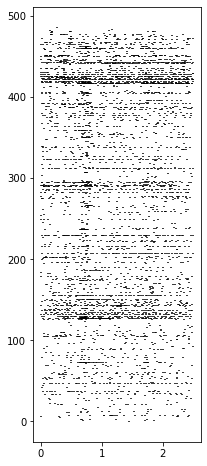

In [65]:
plt.figure(figsize=(3, 8)) #, dpi=150)
plt.eventplot(spike_times_all_cells, linelengths=.8, colors="k");

## Color each brain area in the plot differently

In [45]:
dset.brain_area.shape

(734,)

In [48]:
np.unique(dset.spike_cell).shape

(734,)

In [73]:
cols = ["brain_area"]
area_df = dset[cols].to_dataframe().reset_index().rename(columns={"cell": "spike_cell"})
area_df

,spike_cell,brain_area
0,1,ACA
1,2,MOs
2,3,ACA
3,4,LS
4,5,MOs
...,...,...
729,730,SUB
730,731,DG
731,732,DG
732,733,VISp


In [77]:
spike_area_df_trial_x = pd.merge(spike_df_trial_x, area_df).sort_values(by="brain_area")
spike_area_df_trial_x

,spike_trial,spike_cell,spike_time,brain_area
1590,1,290,1.022058,ACA
790,1,220,2.160392,ACA
791,1,220,2.170992,ACA
792,1,220,2.298792,ACA
793,1,220,2.402925,ACA
...,...,...,...,...
3154,1,458,1.862297,root
3155,1,458,1.878697,root
3156,1,458,1.902530,root
4266,1,563,0.690458,root


In [80]:
spike_area_df_trial_x.brain_area.unique()

array(['ACA', 'CA3', 'DG', 'LS', 'MOs', 'SUB', 'VISp', 'root'],
      dtype=object)

In [105]:
all_colors = {
    'ACA' : "red",
    'CA3' : "navy",
    'DG' : "crimson",
    'LS' : "darkorange",
    'MOs' : "dodgerblue",
    'SUB' : "gold",
    'VISp' : "deeppink",
    'root' : ".3",
}

In [106]:
spike_times_all_cells = []
colors = []
for cell_id in spike_area_df_trial_x.spike_cell.unique():
    spike_times = spike_area_df_trial_x.spike_time[spike_area_df_trial_x.spike_cell == cell_id]
    spike_times_all_cells.append(spike_times)
    
    area = spike_area_df_trial_x.brain_area[spike_area_df_trial_x.spike_cell == cell_id].iloc[0]
    area_color = all_colors[area]
    colors.append(area_color)

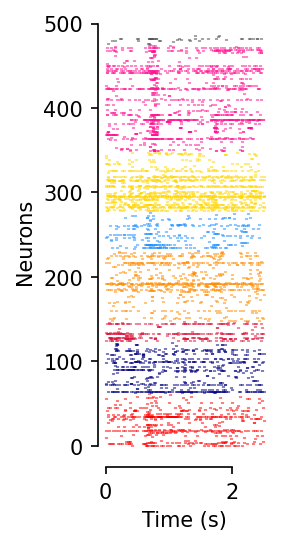

In [110]:
plt.figure(figsize=(1.5, 4), dpi=150)
plt.eventplot(spike_times_all_cells, linelengths=.8, colors=colors);
plt.xlabel("Time (s)")
plt.ylabel("Neurons")
sns.despine(trim=True)